In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
  


('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_12mths=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
prcp_12mths=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >=last_12mths).\
        order_by((Measurement.date).desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12mths_prcp=pd.DataFrame(prcp_12mths).rename(columns={"date":"Date","prcp":"Precipitation"})
last_12mths_prcp





,Date,Precipitation
0,2017-08-23,0.0
1,2017-08-23,0.0
2,2017-08-23,2.0
3,2017-08-23,11.4
4,2017-08-22,0.0
...,...,...
2225,2016-08-23,1.3
2226,2016-08-23,NaN
2227,2016-08-23,0.5
2228,2016-08-23,45.5


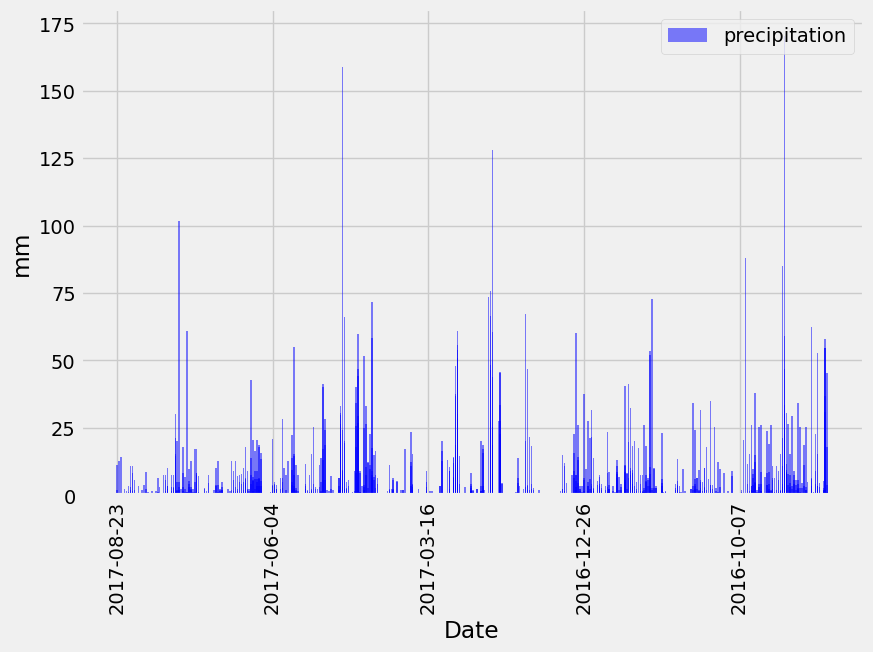

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis=last_12mths_prcp["Date"]
y_axis=last_12mths_prcp["Precipitation"]

plt.figure(figsize =(9,6))
plt.bar(last_12mths_prcp["Date"],last_12mths_prcp["Precipitation"],color="b",alpha=0.5,label="precipitation")
plt.xlabel("Date")
plt.ylabel("mm")
plt.ylim(0,max(last_12mths_prcp["Precipitation"]+10))

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
plt.xticks(rotation=90)
plt.legend(loc="best")

plt.show()


In [23]:
# Calculate summary statistics for the precipitation data using Pandas
prcp_summary=last_12mths_prcp.describe()
prcp_summary


#print(f"Most active station ID: {station_most_active}")
print(f"Lowest Precipitation(mm): {prcp_summary['Precipitation'].min()}")
print(f"Highest Precipitation(mm): {prcp_summary['Precipitation'].max()}")
print(f"Average Precipitation(mm): {prcp_summary['Precipitation'].mean()}")


Lowest Precipitation(mm): 0.0
Highest Precipitation(mm): 2021.0
Average Precipitation(mm): 276.40242186765835


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity=session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_most_active=station_activity[0][0]

station_most_active_tobs=session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.station==station_most_active).all()
station_most_active_tobs_df=pd.DataFrame(station_most_active_tobs)

print(f"Most active station ID: {station_most_active}")
print(f"Lowest Temperature: {station_most_active_tobs_df['tobs'].min()}")
print(f"Highest Temperature: {station_most_active_tobs_df['tobs'].max()}")
print(f"Average Temperature: {station_most_active_tobs_df['tobs'].mean()}")

Most active station ID: USC00519281
Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.03582251082252


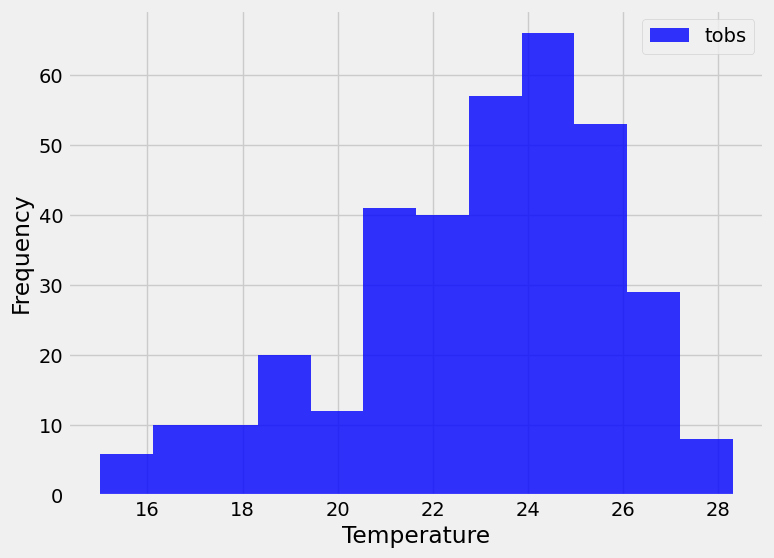

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_12mths=session.query(Measurement.station,Measurement.date,Measurement.tobs).\
    filter(Measurement.date >=last_12mths).\
    filter_by(station=station_most_active).\
    order_by((Measurement.date).desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12mths_tobs=pd.DataFrame(tobs_12mths).rename(columns={"date":"Date","tobs":"Temperature"})

# create a histogram with 12 bins
hist, bins = np.histogram(last_12mths_tobs["Temperature"], bins=12)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis=last_12mths_tobs
plt.figure(figsize =(8,6))
plt.hist(last_12mths_tobs["Temperature"],bins=12,color="b",alpha=0.8, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()